# Exploratory Data Analysis in Python - Relationships
> A Summary of lecture of Writing functions in Python, via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp]
- image: my_icons/fastai_logo.png

## Exploring relationships


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

In [13]:
brfss_original = pd.read_hdf('./dataset/brfss.hdf5', 'brfss')

### PMF of age

Text(0, 0.5, 'PMF')

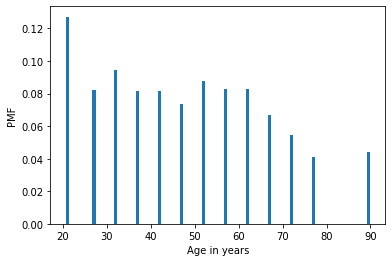

In [14]:
# Extract age
age = Pmf.from_seq(brfss_original['AGE'])

# Plot the PMF
age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')

### Scatter plot

Text(0, 0.5, 'Weight in kg')

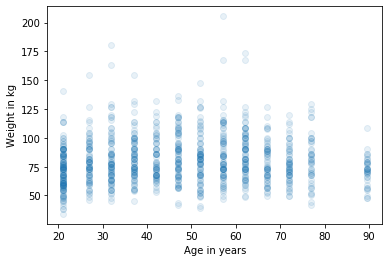

In [15]:
# Select the first 1000 respondents
brfss = brfss_original[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')


### Jittering

Text(0, 0.5, 'Weight in kg')

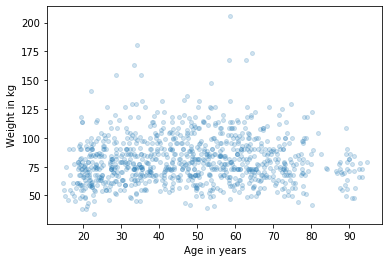

In [17]:
# Select the first 1000 respondents
brfss = brfss_original[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=4, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

## Visualizing relationships


### Height and weight


Text(0, 0.5, 'Weight in kg')

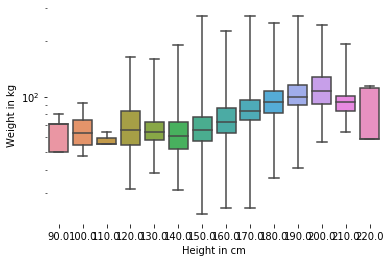

In [19]:
# Drop rows with missing data
data = brfss_original.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

### Distribution of income

Text(0, 0.5, 'PMF')

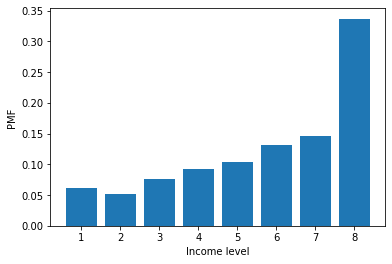

In [21]:
# Extract income
income = brfss_original['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')

### Income and height

Text(0, 0.5, 'Height in cm')

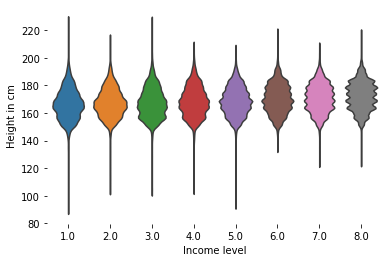

In [22]:
# Drop rows with missing data
data = brfss_original.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')

## Correlation

### Computing correlations


In [23]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss_original[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


## Simple regression

### Income and vegetables

In [24]:
from scipy.stats import linregress

In [27]:
# Extract the variables
subset = brfss_original.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105248, intercept=1.5287786243362973, rvalue=0.11967005884864361, pvalue=1.3785039162157718e-238, stderr=0.002110976356332355)


### Fit a line

(0, 6)

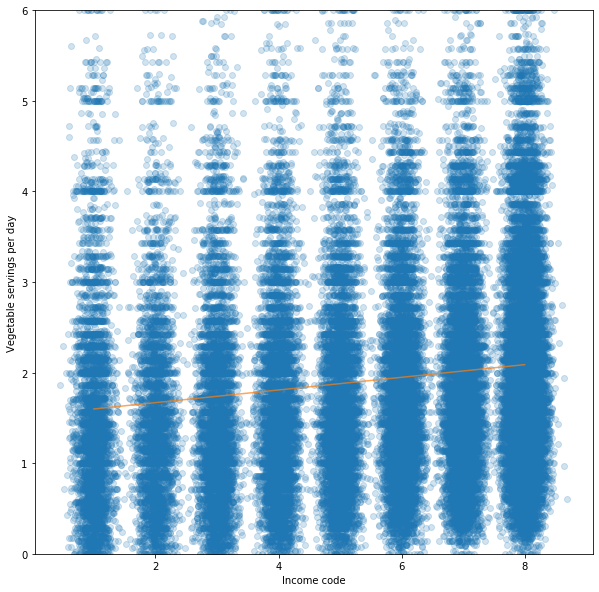

In [30]:
plt.figure(figsize=(10, 10))
# Plot the scatter plot
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])